In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
with h5py.File("./model/special_raw_data.h5", "r") as f:
    times = f["times"][:]
    nus = f["nus"][:]
    special_train_X = f["special_train"]["01"]["X"][:]
    special_train_y = f["special_train"]["01"]["y"][:]
    comment = f["special_train"]["01"].attrs["comment"]

In [3]:
nan_inds = np.unique(np.where(np.isnan(special_train_y))[0])
print(nan_inds)

[]


In [4]:
special_train_y.shape

(30000, 88064)

In [5]:
special_train_y = np.maximum(-50, special_train_y)

## OVERWRITE

In [6]:
with h5py.File("./model/pyblastafterglow_raw_data.h5", "r+") as f:
    f["special_train"].create_group("01")
    f["special_train"]["01"].attrs["comment"] = comment
    f["special_train"]["01"].create_dataset("X", data=special_train_X, maxshape=(None, 9), chunks=(1000,9))
    f["special_train"]["01"].create_dataset("y", data=special_train_y, maxshape=(None,len(nus)*len(times)), chunks=(1000,len(nus) * len(times)) )

## Plot some interesting GRBs

In [70]:
problematic_inds = np.unique(np.where(np.diff((special_train_y.reshape(-1, 256, 344))[:, 125, 282:])>0)[0])

(-50.0, 50.0)

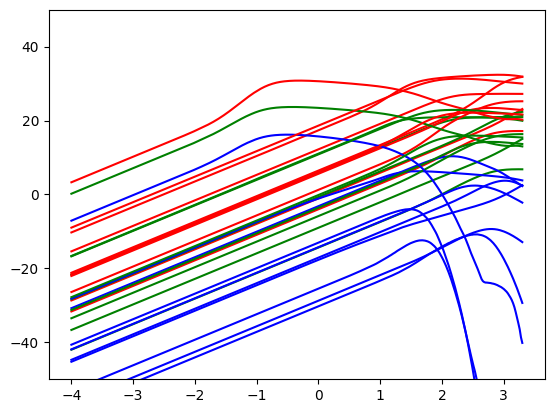

In [92]:
for j in problematic_inds[4000:4010]:
    for c, ind in zip(["red", "green", "blue"],[0, 125, 250]):
        plt.plot(np.log10(times), special_train_y[j].reshape(len(nus), len(times))[ind,:], color=c)

plt.ylim(-50,50)